In [1]:
import pandas as pd
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
bank=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/main/bank-full.csv',delimiter = ';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#### preprocessing data

In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
### treating the categorical column
from sklearn.preprocessing import LabelEncoder
bank['y'] = LabelEncoder().fit_transform(bank['y'])

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [11]:
dummies = pd.get_dummies(bank)
train,test = train_test_split(dummies,test_size=0.3,random_state=100)

In [12]:
train_x = train.drop('y',axis=1)
train_y = train['y']

test_x =test.drop('y',axis=1)
test_y = test['y']

In [14]:
from sklearn.metrics import accuracy_score 

In [21]:
### decision tree
model1 = DecisionTreeClassifier()
model1.fit(train_x,train_y)
pred = model1.predict(test_x)
Decision = accuracy_score(test_y,pred)*100

In [22]:
### Random Forest
model2  = RandomForestClassifier()
model2.fit(train_x,train_y)
pred = model2.predict(test_x)
Random = accuracy_score(test_y,pred)*100

In [23]:
### Ada Boost 
model3 = AdaBoostClassifier()
model3.fit(train_x,train_y)
pred = model3.predict(test_x)
Ada = accuracy_score(test_y,pred)*100

In [25]:
### KNN
model4 = KNeighborsClassifier()
model4.fit(train_x,train_y)
pred = model4.predict(test_x)
KNN = accuracy_score(test_y,pred)*100

In [31]:
df = {'models':['Decision','Random','Ada','KNN'],
                 'accuracy':[Decision,Random,Ada,KNN] }

New_data = pd.DataFrame(df)

In [48]:
New_data = New_data.sort_values(by = ['accuracy'],ascending = True)

In [50]:
New_data

,models,accuracy
0,Decision,87.695370
3,KNN,88.056620
2,Ada,89.722796
1,Random,90.467414


In [34]:
from matplotlib import pyplot 

<function matplotlib.pyplot.show(*args, **kw)>

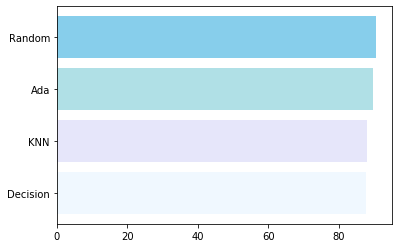

In [49]:
pyplot.barh(New_data['models'],New_data['accuracy'],color = ['#F0F8FF','#E6E6FA','#B0E0E6','skyblue'])
pyplot.show